In [1]:
from importlib import reload 
import src.final_pipeline as f
import src.make_user_percentile_profile as m
from src import TrainModels


reload(m)
reload(f)

#Load the intial data
long_key, questions, grading_Key,graded_df, meta = f.load_Graded_data()

# Load the dictionarys
keys2trait, Trait_dict_keys = f.create_k2t(long_key)

(153656, 300)


In [295]:
#Number of questions for training
reload(TrainModels)
print("How many questions would you like (max) per trait")
max_depth = -1
while (max_depth < 0) or (max_depth > 15):
    max_depth = input('Enter a integer between 2 and 15: ')
    max_depth = int(max_depth)
    
# break
print('\n','-'*50,'\n')

#Identify the sex
sex = -1
while (sex != 'm') and (sex != 'f'):
    sex = input('Male (m) or Female (f)?')

if sex == 'm':
    nums = meta[meta.sex == '2'].number
elif sex == 'f':
    nums = meta[meta.sex == '1'].number
    
questions = questions.loc[nums,:]
    
# Train the Model
Trait_dict_questions = f.nested_dict(Trait_dict_keys,long_key)

percentile_df, traits_df = m.make_user_profiles(long_key,questions, grading_Key, keys2trait, Trait_dict_keys, Trait_dict_questions)


print('\n\nTraining Models!')
Traits,models = TrainModels.Train_models(traits_df,questions,max_depth)
print('\nModels are trained!')

How many questions would you like (max) per trait
Enter a integer between 2 and 15: 6

 -------------------------------------------------- 

Male (m) or Female (f)?m
Openness
Conscientiousness
Extraversion
Agreeableness
Neuroticism
--------------------------------------------------
time =  0.4966890811920166





Training Models!
5

Model:  Openness

Done Training Model 1
--Remaining:  4 --
Mean abs error: 12.91% 
 --------------------------------------------------

Model:  Conscientiousness

Done Training Model 2
--Remaining:  3 --
Mean abs error: 11.23% 
 --------------------------------------------------

Model:  Extraversion

Done Training Model 3
--Remaining:  2 --
Mean abs error: 10.99% 
 --------------------------------------------------

Model:  Agreeableness

Done Training Model 4
--Remaining:  1 --
Mean abs error: 13.06% 
 --------------------------------------------------

Model:  Neuroticism

Done Training Model 5
--Remaining:  0 --
Mean abs error: 10.81% 
 ----------------

In [296]:
from src import game as g
reload(g)

quiz = g.Quiz()
for i,model in enumerate(models):
    tree = model.tree_
    
    print(Traits[i])

    if i == 0:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i])
    else:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i],(True,df))
    #print(Traits[i])
    print('\n\n')

Openness
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Have difficulty imagining things. 2
Do not like art. 2
Am not interested in theoretical discussions. 2
Enjoy wild flights of fantasy. 2
Prefer to stick with things that I know. 2
Enjoy thinking about things. 2

RMSE =  16.31 


You fall in the 29.07% percentile of this trait which correponds to node: 24



Conscientiousness
next trait:  Conscientiousness
Have difficulty starting tasks. 2
Work hard. 2
Leave a mess in my room. 2
Carry out my plans. 2
Do the opposite of what is asked. 2
Get to work at once. 2

RMSE =  16.88 


You fall in the 32.483% percentile of this trait which correponds to node: 84



Extraversion
next trait:  Extraversion
Talk to a lot of different people at p

/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


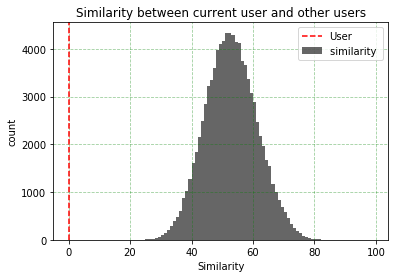

In [297]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse
import numpy as np
from numpy.random import rand
import random

from collections import Counter
import matplotlib.pyplot as plt

### Recommender System
#Get the Users ratings
uservals = quiz.df.loc[0,:]

#Look at what others answered to the same questions
everyone = questions[quiz.df.columns[uservals.nonzero()]]

#Find the difference between others and current user
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])

#sort the values based on the sum
ind = everyone_abs.sum(axis = 1).sort_values()[:30].index

#take the mean of the closest 10 users
percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)

plt.hist(everyone_abs.sum(axis = 1),
         bins = range(0,100),
         label = 'similarity ',
         color = 'k',
         alpha = .6)
plt.title('Similarity between current user and other users')
plt.ylabel('count')
plt.xlabel('Similarity')
plt.grid(alpha = .4,c= 'g',ls = '--')
plt.axvline(0,label = 'User',c = 'r',ls = '--')
plt.legend()
plt.show()

2QUestionModel                       Friday_mvp_checkpoint1
6QUestionModel                       IPIP-NEO-ItemKey_csv.csv
DAT300.doc                           IPIP300.dat
Friday_mvp_checkpoint                Most_important_questions_by_sex.csv


In [8]:
from src import unpickle 
from src import game
from importlib import reload
reload(unpickle)
filepath = 'data/2QUestionModel'

long_key, questions, grading_Key,\
    keys2trait, Trait_dict_keys, Trait_dict_questions,\
    graded_df, percentile_df, traits_df= unpickle.Load_pickled_files('Friday_mvp_checkpoint1')

quiz = game.Quiz(questions)

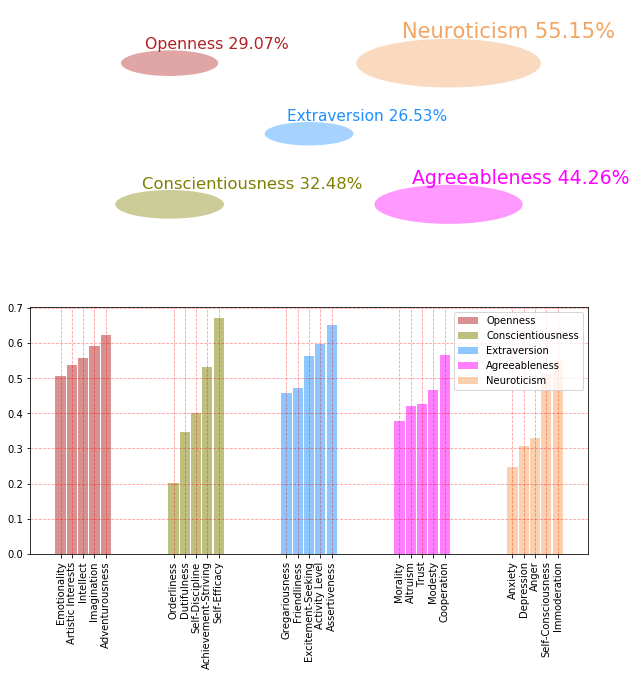

In [298]:
import src.plot_traits as pt
reload(pt)
trait_scores = np.array(quiz.Trait_score)/100

ax = pt.plot(trait_scores,percentile_df_user,keys2trait)
ax[0].axis('off');

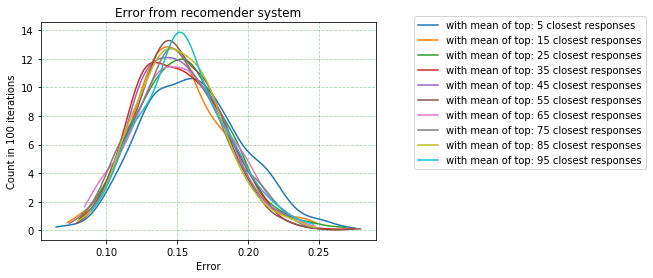

In [301]:
### Recommender System

from scipy import stats
#Get the Users ratings
uservals = quiz.df.loc[0,:]

#Look at what others answered to the same questions
everyone = questions[quiz.df.columns[uservals.nonzero()]]

#Find the difference between others and current user
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])

#sort the values based on the sum
ind = everyone_abs.sum(axis = 1).sort_values()[:10].index

#reset the index for the percentile df 
percentile_df = percentile_df.set_index(questions.index)

#take the mean of the closest 10 users
percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)




mean_err = []
for q in range(5,100,10):
    error = []
    for i in range(500):
        questions[quiz.df.columns[uservals.nonzero()]]

        test_user = questions.sample(1).index[0]

        test = questions.loc[test_user,:]

        everyone_abs = np.abs(everyone - test[quiz.df.columns[uservals.nonzero()]])
        ind = everyone_abs.sum(axis = 1).sort_values()[1:q].index


        val = np.mean(np.abs(percentile_df.loc[test_user,:] - percentile_df.loc[ind,:].mean(axis = 0)))
        error.append(val)
    error = np.array(error) 
    kde = stats.gaussian_kde(error[~np.isnan(error)])
    xx = np.linspace(min(error[~np.isnan(error)]), 
                     max(error[~np.isnan(error)]), 
                     100)
    
    plt.plot(xx, kde(xx),label = 'with mean of top: '+str(q)+' closest responses')
    mean_err.append(np.mean(error))
plt.legend()
plt.title('Error from recomender system')
plt.xlabel('Error')
plt.ylabel('Count in 100 iterations')
from matplotlib.font_manager import FontProperties

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(alpha = .35,c = 'g',ls = '--')


Text(0,0.5,'Mean Error')

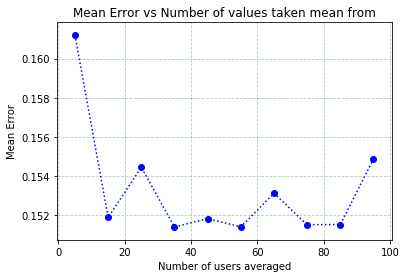

In [302]:
plt.plot(range(5,100,10),mean_err,linestyle = ':',c = 'b')
plt.scatter(range(5,100,10),mean_err,c = 'b')
plt.grid(alpha = .35,c = 'g',ls = '--')
plt.title('Mean Error vs Number of values taken mean from')
plt.xlabel('Number of users averaged')
plt.ylabel('Mean Error')

In [13]:
### Recommender System

from scipy import stats
#Get the Users ratings
uservals = quiz.df.loc[0,:]

#Look at what others answered to the same questions
everyone = questions[quiz.df.columns[uservals.nonzero()]]

#Find the difference between others and current user
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])

#sort the values based on the sum
ind = everyone_abs.sum(axis = 1).sort_values()[:10].index

#take the mean of the closest 10 users
percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)


percentile_df = percentile_df.set_index(questions.index)

mean_err = []
for q in range(10,50,1):
    error = []
    for i in range(200):
        questions[quiz.df.columns[uservals.nonzero()]]

        test_user = questions.sample(1).index[0]

        test = questions.loc[test_user,:]

        everyone_abs = np.abs(everyone - test[quiz.df.columns[uservals.nonzero()]])
        ind = everyone_abs.sum(axis = 1).sort_values()[1:q].index


        val = np.mean(np.abs(percentile_df.loc[test_user,:] - percentile_df.loc[ind,:].mean(axis = 0)))
        error.append(val)
    error = np.array(error) 
#     kde = stats.gaussian_kde(error[~np.isnan(error)])
#     xx = np.linspace(min(error[~np.isnan(error)]), 
#                      max(error[~np.isnan(error)]), 
#                      100)
    
#     plt.plot(xx, kde(xx),label = 'with mean of top: '+str(q)+' closest Responses')
    mean_err.append(np.mean(error))
# plt.legend()
# plt.title('Error from recomender system')
# plt.xlabel('Error')
# plt.ylabel('Count in 100 iterations')
# from matplotlib.font_manager import FontProperties

# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.grid(alpha = .35,c = 'g',ls = '--')


KeyboardInterrupt: 

In [ ]:
plt.plot(range(10,50,1),mean_err,linestyle = ':',c = 'b')
plt.scatter(range(10,50,1),mean_err,c = 'b')
plt.grid(alpha = .35,c = 'g',ls = '--')
plt.title('Mean Error vs Number of values taken mean from')
plt.xlabel('Numbner of users averaged')
plt.ylabel('Mean Error')

In [ ]:
corr = []
names = []
for i,col1 in enumerate(questions.columns):
    for j,col2 in enumerate(questions.columns):
        if j >i:
            corr.append(np.corrcoef(questions[col1],questions[col2])[1][0])
            names.append(col1+' - '+col2)

            
        

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
_,ax = plt.subplots(1,1,figsize = (5,20))

nums = np.array(range(0,len(vals),1))/255
colors = []

for i,num in enumerate(nums):
    colors.append(((255-3*i)/255,i/255,(105-i)/255))
ax.bar(vals,range(len(vals)),color= colors)

ax.set_yticks(range(len(vals)))
ax.set_yticklabels(names);
plt.grid(alpha = .4,color = 'g',ls = ':')
plt.xlabel('Correlation between Questions')
plt.ylabel('Two questions')
plt.title('Pairs of questions and the correlation between each')